## 3. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.
 
You will have access to two types of time series data:
 1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast. These data usually cover a period of 1-4 years.
 2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**
1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Exploratory analysis:** You must do an exploratory analysis of the data. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. 
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
In addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 5, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

In [36]:
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, MultiTaskLassoCV

In [2]:
#Load Risoe-meso data
risoe_meso_df = pd.read_csv('Data/Risoe/meso_Risoe.csv')

# #drop columns (keep the WS* and WDIR* columns)
risoe_meso_df = risoe_meso_df.loc[:, (risoe_meso_df.columns == 'TIMESTAMP') | (risoe_meso_df.columns.str.contains('WS')) | (risoe_meso_df.columns.str.contains('WDIR'))]

# #cast timestamp column of type object to datetime
risoe_meso_df['TIMESTAMP'] = pd.to_datetime(risoe_meso_df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S').dt.tz_localize('UTC')

#set index to dt_time_utc
risoe_meso_df.set_index('TIMESTAMP', inplace=True)
risoe_meso_df.head(10)

,WSP060,WSP080,WSP100,WSP120,WSP140,WSP160,WSP180,WSP200,WSP220,WDIR060,WDIR080,WDIR100,WDIR120,WDIR140,WDIR160,WDIR180,WDIR200,WDIR220
TIMESTAMP,,,,,,,,,,,,,,,,,,
2001-06-10 15:00:00+00:00,1.71,1.77,1.82,1.88,1.95,2.02,2.12,2.23,2.35,92.76,94.47,96.71,99.34,102.54,106.13,110.31,115.34,119.83
2001-06-10 16:00:00+00:00,0.32,0.38,0.43,0.48,0.53,0.58,0.63,0.70,0.76,153.00,158.45,162.63,166.00,168.85,171.30,173.44,175.35,176.98
2001-06-10 17:00:00+00:00,0.92,0.93,0.93,0.93,0.93,0.92,0.92,0.91,0.91,314.87,313.49,312.13,310.79,309.37,307.87,306.32,304.70,303.05
2001-06-10 18:00:00+00:00,1.54,1.60,1.64,1.67,1.68,1.69,1.69,1.68,1.67,356.94,357.14,357.29,357.42,357.55,357.67,357.79,357.88,357.98
2001-06-10 19:00:00+00:00,5.07,5.50,5.80,5.98,6.02,5.95,5.82,5.60,5.38,16.78,19.64,22.01,24.14,25.50,26.31,26.56,25.90,25.14
2001-06-10 20:00:00+00:00,4.64,5.12,5.43,5.59,5.65,5.62,5.59,5.52,5.46,33.86,37.08,39.55,41.67,42.96,43.63,44.14,44.42,44.72
2001-06-10 21:00:00+00:00,2.38,2.31,2.28,2.29,2.45,2.75,3.08,3.46,3.82,57.74,65.30,69.17,69.59,67.07,62.83,59.50,56.94,54.88
2001-06-10 22:00:00+00:00,1.77,1.60,1.54,1.59,1.73,1.96,2.20,2.44,2.68,345.23,349.08,354.82,1.38,6.88,10.88,13.60,15.19,16.38
2001-06-10 23:00:00+00:00,3.29,3.39,3.42,3.39,3.41,3.47,3.61,3.85,4.11,336.50,340.23,342.79,344.52,346.02,347.25,348.48,349.66,350.67


In [3]:
risoe_meso_df.head()
# risoe_meso_df.describe()
# risoe_meso_df.info()

#print columns and number of their missing values if bigger than 0
for col in risoe_meso_df.columns:
    if risoe_meso_df[col].isnull().sum() > 0:
        print(col, risoe_meso_df[col].isnull().sum())

In [4]:
#reduce columns to equals="TIMESTAMP" and are like "WSP*" or "WDIR*"
# risoe_meso_df = risoe_meso_df.loc[:, risoe_meso_df.columns.str.contains('TIMESTAMP|WSP|WDIR')]

risoe_meso_df.head()

,WSP060,WSP080,WSP100,WSP120,WSP140,WSP160,WSP180,WSP200,WSP220,WDIR060,WDIR080,WDIR100,WDIR120,WDIR140,WDIR160,WDIR180,WDIR200,WDIR220
TIMESTAMP,,,,,,,,,,,,,,,,,,
2001-06-10 15:00:00+00:00,1.71,1.77,1.82,1.88,1.95,2.02,2.12,2.23,2.35,92.76,94.47,96.71,99.34,102.54,106.13,110.31,115.34,119.83
2001-06-10 16:00:00+00:00,0.32,0.38,0.43,0.48,0.53,0.58,0.63,0.70,0.76,153.00,158.45,162.63,166.00,168.85,171.30,173.44,175.35,176.98
2001-06-10 17:00:00+00:00,0.92,0.93,0.93,0.93,0.93,0.92,0.92,0.91,0.91,314.87,313.49,312.13,310.79,309.37,307.87,306.32,304.70,303.05
2001-06-10 18:00:00+00:00,1.54,1.60,1.64,1.67,1.68,1.69,1.69,1.68,1.67,356.94,357.14,357.29,357.42,357.55,357.67,357.79,357.88,357.98
2001-06-10 19:00:00+00:00,5.07,5.50,5.80,5.98,6.02,5.95,5.82,5.60,5.38,16.78,19.64,22.01,24.14,25.50,26.31,26.56,25.90,25.14


In [5]:
#Load Risoe mast data
risoe_mast_ds = nc.Dataset('Data/Risoe/risoe_m_all.nc')
#reduce columns to the time, ws and wd

#initiate empty dataframe
risoe_mast_df = pd.DataFrame()

# Get the data from the netCDF file and put it into a pandas dataframe
for var in risoe_mast_ds.variables:
    if var != 'time':
        risoe_mast_df[var] = risoe_mast_ds[var][:]
    else:
        risoe_mast_df[var] = nc.num2date(risoe_mast_ds[var][:], risoe_mast_ds[var].units)


# reduce columns that equals "time" and are like "ws*" or "wd*"
risoe_mast_df = risoe_mast_df.loc[:, (risoe_mast_df.columns == 'time') | (risoe_mast_df.columns.str.contains('ws')) | (risoe_mast_df.columns.str.contains('wd'))]
# remove columns ending with "qc"
risoe_mast_df = risoe_mast_df.loc[:, ~risoe_mast_df.columns.str.endswith('qc')]


#cast time column of type object to datetime with timzone of copehagen timezone
risoe_mast_df['dt_time'] = pd.to_datetime(risoe_mast_df['time'], format='%Y-%m-%d %H:%M:%S')
#set dt_time to have copehagen timezone
# risoe_mast_df['dt_time2'] = risoe_mast_df['dt_time'].dt.tz_localize('Europe/Copenhagen')
risoe_mast_df['dt_time2'] = risoe_mast_df['dt_time'].dt.tz_localize('UTC')

#convert dt_time to corresponding utc time
risoe_mast_df['dt_time_utc'] = risoe_mast_df['dt_time2'].dt.tz_convert('UTC')

risoe_mast_df[['time','dt_time','dt_time2', 'dt_time_utc']].head()
#print one row of dt_time and dt_time_utc of each month to check if the time is correct
for i in range(1, 13):
    print(risoe_mast_df[['dt_time', 'dt_time_utc']].where(risoe_mast_df['dt_time'].dt.month == i).dropna().head(1))


#set index to dt_time_utc
risoe_mast_df.set_index('dt_time_utc', inplace=True)

                 dt_time               dt_time_utc
5950 1996-01-01 00:05:00 1996-01-01 00:05:00+00:00
                  dt_time               dt_time_utc
10414 1996-02-01 00:05:00 1996-02-01 00:05:00+00:00
                  dt_time               dt_time_utc
14590 1996-03-01 00:05:00 1996-03-01 00:05:00+00:00
                  dt_time               dt_time_utc
19054 1996-04-01 00:05:00 1996-04-01 00:05:00+00:00
                  dt_time               dt_time_utc
23374 1996-05-01 00:05:00 1996-05-01 00:05:00+00:00
                  dt_time               dt_time_utc
27838 1996-06-01 00:05:00 1996-06-01 00:05:00+00:00
                  dt_time               dt_time_utc
32158 1996-07-01 00:05:00 1996-07-01 00:05:00+00:00
                  dt_time               dt_time_utc
36622 1996-08-01 00:05:00 1996-08-01 00:05:00+00:00
                  dt_time               dt_time_utc
41086 1996-09-01 00:05:00 1996-09-01 00:05:00+00:00
                  dt_time               dt_time_utc
45406 1996-10-

In [6]:
# risoe_mast_df.head()
# risoe_mast_df.describe()
risoe_mast_df.info()

#print columns and number of their missing values if bigger than 0
for col in risoe_mast_df.columns:
    if risoe_mast_df[col].isnull().sum() > 0:
        print(col, risoe_mast_df[col].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 628359 entries, 1995-11-20 16:25:00+00:00 to 2007-12-31 23:56:00+00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   time      628359 non-null  object             
 1   ws44      480818 non-null  float64            
 2   ws77      621607 non-null  float64            
 3   ws125     541705 non-null  float64            
 4   wd77      627811 non-null  float64            
 5   wd125     558830 non-null  float64            
 6   dt_time   628359 non-null  datetime64[ns]     
 7   dt_time2  628359 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), object(1)
memory usage: 43.1+ MB
ws44 147541
ws77 6752
ws125 86654
wd77 548
wd125 69529


In [7]:
#check if ws-columns are positive values ->get min and max of the ws-like columns
risoe_mast_df.loc[:, risoe_mast_df.columns.str.contains('ws')].agg(['min', 'max'])

,ws44,ws77,ws125
min,0.00,0.00,0.0
max,30.91,32.17,34.3


In [8]:
#check if wd-columns are between 0 and 360 ->get min and max of the wd-like columns
risoe_mast_df.loc[:, risoe_mast_df.columns.str.contains('wd')].agg(['min', 'max'])

,wd77,wd125
min,0.0,0.0
max,360.0,360.0


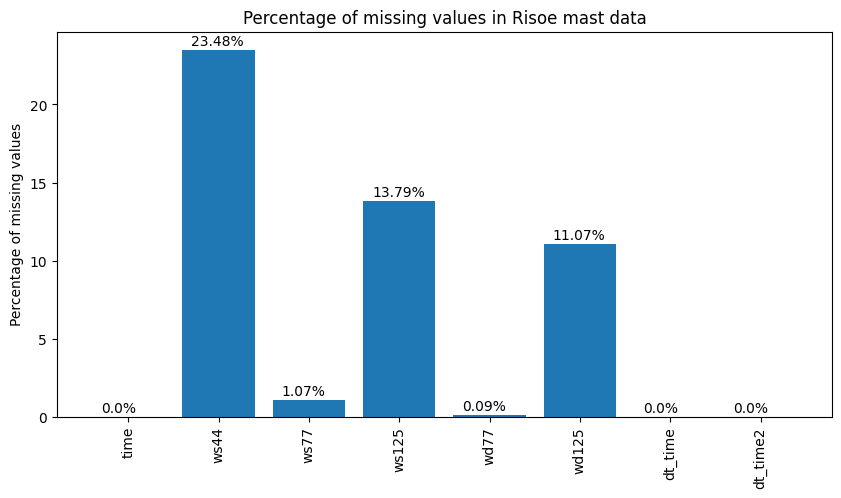

In [9]:
#plot bar chart of percentage of missing values in risoe_mast_df
#calculate percentage of missing values
missing_values = risoe_mast_df.isnull().sum() / len(risoe_mast_df) * 100

#plot bar chart wiht the percentage values written on top of the bars
plt.figure(figsize=(10,5))
plt.bar(missing_values.index, missing_values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in Risoe mast data')
for i, v in enumerate(missing_values):
    plt.text(i-0.3, v+0.3, str(round(v, 2))+'%')
plt.show()

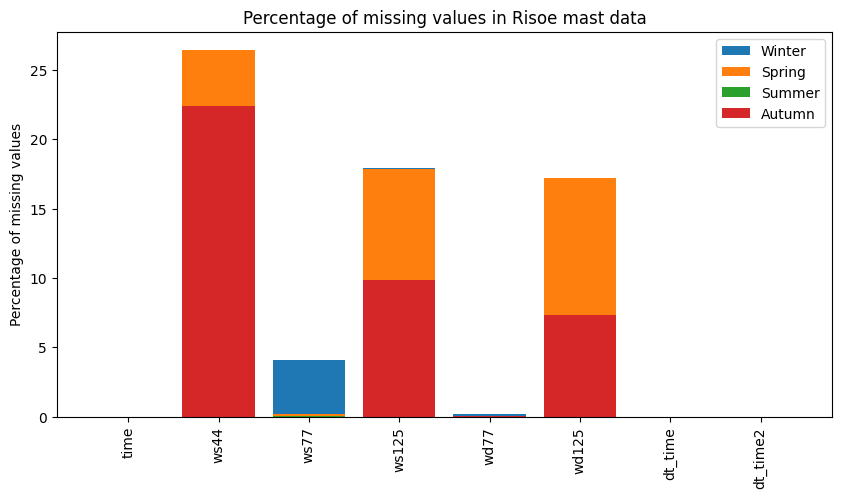

In [10]:
#plot bar chart of percentage of missing values in risoe_mast_df

#get percentages of missing values of risoe_mast_df where the time is in winter
missing_values_winter = risoe_mast_df.loc[risoe_mast_df['dt_time'].dt.month.isin([12, 1, 2])].isnull().sum() / len(risoe_mast_df.loc[risoe_mast_df['dt_time'].dt.month.isin([12, 1, 2])]) * 100
#get percentages of missing values of risoe_mast_df where the time is in spring
missing_values_spring = risoe_mast_df.loc[risoe_mast_df['dt_time'].dt.month.isin([3, 4, 5])].isnull().sum() / len(risoe_mast_df.loc[risoe_mast_df['dt_time'].dt.month.isin([3, 4, 5])]) * 100
#get percentages of missing values of risoe_mast_df where the time is in summer
missing_values_summer = risoe_mast_df.loc[risoe_mast_df['dt_time'].dt.month.isin([6, 7, 8])].isnull().sum() / len(risoe_mast_df.loc[risoe_mast_df['dt_time'].dt.month.isin([6, 7, 8])]) * 100
#get percentages of missing values of risoe_mast_df where the time is in autumn
missing_values_autumn = risoe_mast_df.loc[risoe_mast_df['dt_time'].dt.month.isin([9, 10, 11])].isnull().sum() / len(risoe_mast_df.loc[risoe_mast_df['dt_time'].dt.month.isin([9, 10, 11])]) * 100

#plot bar chart wiht the overall percentage values written on top of the bars
plt.figure(figsize=(10,5))
plt.bar(missing_values_winter.index, missing_values_winter, label='Winter')
plt.bar(missing_values_spring.index, missing_values_spring, label='Spring')
plt.bar(missing_values_summer.index, missing_values_summer, label='Summer')
plt.bar(missing_values_autumn.index, missing_values_autumn, label='Autumn')
plt.xticks(rotation=90)
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in Risoe mast data')
plt.legend()
plt.show()


In [11]:
risoe_mast_df.head()

,time,ws44,ws77,ws125,wd77,wd125,dt_time,dt_time2
dt_time_utc,,,,,,,,
1995-11-20 16:25:00+00:00,1995-11-20 16:25:00,NaN,3.36,3.04,205.0,208.0,1995-11-20 16:25:00,1995-11-20 16:25:00+00:00
1995-11-20 16:35:00+00:00,1995-11-20 16:35:00,NaN,3.05,3.17,205.0,214.0,1995-11-20 16:35:00,1995-11-20 16:35:00+00:00
1995-11-20 16:45:00+00:00,1995-11-20 16:45:00,NaN,3.59,3.64,204.0,209.0,1995-11-20 16:45:00,1995-11-20 16:45:00+00:00
1995-11-20 16:55:00+00:00,1995-11-20 16:55:00,NaN,3.87,3.77,202.0,209.0,1995-11-20 16:55:00,1995-11-20 16:55:00+00:00
1995-11-20 17:05:00+00:00,1995-11-20 17:05:00,NaN,4.74,4.28,201.0,212.0,1995-11-20 17:05:00,1995-11-20 17:05:00+00:00


In [12]:
#resample risoe_mast_df to hourly data and aggregate ws-columns to mean and wd-columns to median
risoe_mast_resampled = risoe_mast_df.resample('H').agg({'ws77':'mean', 'ws125':'mean', 'wd77':'median', 'wd125':'median'})

In [13]:
#merge risoe_mast_resampled and risoe_meso_df on dt_time_utc and TIMESTAMP
risoe_merged = pd.merge(risoe_mast_resampled, risoe_meso_df, left_on='dt_time_utc', right_on='TIMESTAMP', how='inner')

In [14]:
#ANALYSIS
risoe_merged.head()

,ws77,ws125,wd77,wd125,WSP060,WSP080,WSP100,WSP120,WSP140,WSP160,...,WSP220,WDIR060,WDIR080,WDIR100,WDIR120,WDIR140,WDIR160,WDIR180,WDIR200,WDIR220
0,7.255000,8.593333,184.5,187.5,5.40,5.83,6.22,6.58,7.02,7.53,...,8.74,208.02,209.09,210.18,211.28,213.04,215.21,217.36,219.69,221.83
1,6.573333,7.775000,183.5,185.0,5.67,6.13,6.63,7.18,7.64,8.02,...,8.96,203.13,204.21,205.73,207.50,209.30,211.15,213.36,216.19,219.00
2,6.203333,7.633333,197.0,194.5,6.12,6.69,7.23,7.74,8.24,8.73,...,9.92,203.82,204.75,205.80,206.93,208.38,210.04,211.87,214.06,216.20
3,6.701667,8.031667,202.0,201.0,5.84,6.37,6.92,7.46,8.03,8.61,...,10.04,210.63,211.50,212.55,213.70,215.22,216.97,218.76,220.77,222.67
4,7.120000,8.331667,196.5,198.5,5.56,6.20,6.79,7.34,7.85,8.32,...,9.55,216.27,217.37,218.55,219.78,221.10,222.48,223.87,225.37,226.79


In [15]:
#Weibull Distribution
# Fitting the distribution risoerisoe_merged.isisisna()risoerisoe_merged.isisisna()risoerisoe_merged.isisisna()risoerisoe_merged.isisisna()risoerisoe_merged.isisisna()risoerisoe_merged.isisisna()risoerisoe_merged.isisisna()risoerisoe_merged.isisisna()
risoe_merged=risoe_merged.dropna()
ws77 = risoe_merged['ws77']
ws125 = risoe_merged['ws125']
ws60 = risoe_merged['WSP060']
ws100 = risoe_merged['WSP100']
ws120 = risoe_merged['WSP120']

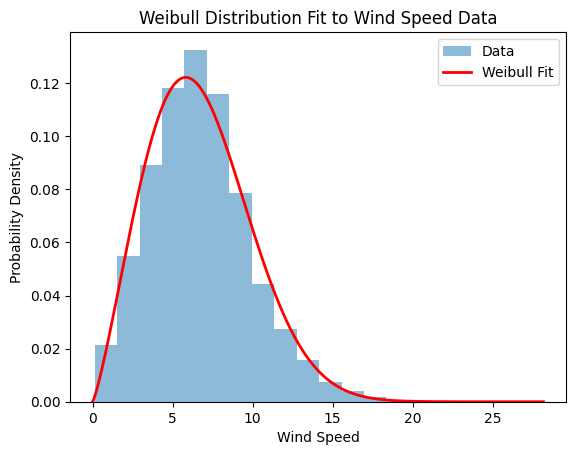

In [16]:
shape, loc, scale = stats.weibull_min.fit(ws77, floc=0)
x = np.linspace(0, ws77.max(), 1000)
# Generating a probability distribution function using the fitted parameters
pdf = stats.weibull_min.pdf(x, shape, loc, scale)
plt.hist(ws77, bins=20, density=True, alpha=0.5, label='Data')
plt.plot(x, pdf, 'r-', lw=2, label='Weibull Fit')
plt.legend()
plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.title('Weibull Distribution Fit to Wind Speed Data')
plt.show()

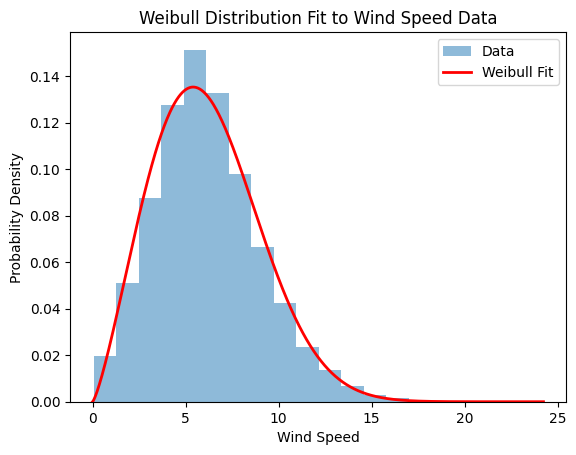

In [17]:
shape, loc, scale = stats.weibull_min.fit(ws60, floc=0)
x = np.linspace(0, ws60.max(), 1000)
# Generating a probability distribution function using the fitted parameters
pdf = stats.weibull_min.pdf(x, shape, loc, scale)
plt.hist(ws60, bins=20, density=True, alpha=0.5, label='Data')
plt.plot(x, pdf, 'r-', lw=2, label='Weibull Fit')
plt.legend()
plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.title('Weibull Distribution Fit to Wind Speed Data')
plt.show()

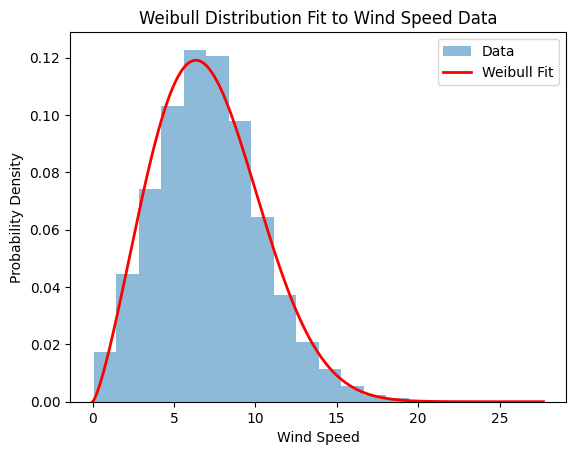

In [18]:
shape, loc, scale = stats.weibull_min.fit(ws100, floc=0)
x = np.linspace(0, ws100.max(), 1000)
# Generating a probability distribution function using the fitted parameters
pdf = stats.weibull_min.pdf(x, shape, loc, scale)
plt.hist(ws100, bins=20, density=True, alpha=0.5, label='Data')
plt.plot(x, pdf, 'r-', lw=2, label='Weibull Fit')
plt.legend()
plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.title('Weibull Distribution Fit to Wind Speed Data')
plt.show()

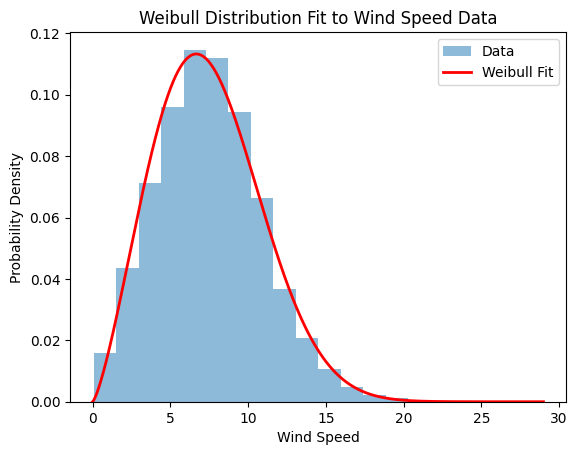

In [19]:
shape, loc, scale = stats.weibull_min.fit(ws120, floc=0)
x = np.linspace(0, ws120.max(), 1000)
# Generating a probability distribution function using the fitted parameters
pdf = stats.weibull_min.pdf(x, shape, loc, scale)
plt.hist(ws120, bins=20, density=True, alpha=0.5, label='Data')
plt.plot(x, pdf, 'r-', lw=2, label='Weibull Fit')
plt.legend()
plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.title('Weibull Distribution Fit to Wind Speed Data')
plt.show()

In [20]:
#Correlation Matrix
corr_matrix = risoe_merged.corr()
# Displaying how each feature correlates to the disposition score
corr_matrix["ws77"].sort_values(ascending=False)

ws77       1.000000
ws125      0.954332
WSP060     0.859007
WSP080     0.854477
WSP100     0.848946
WSP120     0.843344
WSP140     0.838646
WSP160     0.834675
WSP180     0.830942
WSP200     0.828441
WSP220     0.824990
WDIR200    0.130232
WDIR220    0.129629
WDIR180    0.128047
WDIR160    0.126312
WDIR140    0.123942
WDIR120    0.121656
WDIR100    0.120491
WDIR080    0.116858
WDIR060    0.115833
wd125      0.099784
wd77       0.080713
Name: ws77, dtype: float64

In [30]:
target = risoe_merged[['ws77']]
data = risoe_merged[['ws125','WSP060','wd77']]

In [31]:
X_train, X_test , y_train, y_test = train_test_split(target, data, random_state=1)

In [32]:
alphas = 10**np.linspace(-10, 10, 100)

In [33]:
ridgecv = RidgeCV(alphas = alphas)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

849.7534359086438

In [34]:
print("R^2 on train data is {} and on test data is {}".format(ridgecv.score(X_train, y_train), 
                                                              ridgecv.score(X_test,y_test)))

R^2 on train data is 0.5518888816604813 and on test data is 0.5511747664477563


In [38]:
lasso = Lasso(max_iter = 10000)

In [40]:
lassocv = MultiTaskLassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print("R^2 on train data is {} and on test data is {}".format(lassocv.score(X_train, y_train), 
                                                              lassocv.score(X_test,y_test)))

R^2 on train data is 0.5518909484663506 and on test data is 0.5511761789713019


In [23]:
#split : 77<->80 and 125<->120